<a href="https://www.kaggle.com/code/jaikrishna612/brain-mri-cnn?scriptVersionId=118307642" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/34 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N20.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N1.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/49 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N15.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/No18.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/31 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 6.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/3 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 5.jpeg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 1.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/26 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N26.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N5.jpg
/kaggle/input/brain-mri-images-for-b

In [162]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dense

In [163]:
os.listdir()

['.virtual_documents', '__notebook_source__.ipynb']

In [164]:
os.listdir("/kaggle/input/brain-mri-images-for-brain-tumor-detection")

['no', 'yes', 'brain_tumor_dataset']

In [189]:
classes = ['no','yes']
def cs_images(path,classes):
    imag = []
    label = []
    for i in classes:
        l1 = os.listdir(path+'/'+i)
        for j in l1:
            img = Image.open(path+i+'/'+j)
            img = img.resize(size = (32,32)).convert("RGB")
#             img = img.reshape(img.shape[0],img.shape[1],1)
            imag.append(np.array(img))
            label.append(classes.index(i))
            del(img)
    %matplotlib inline 
    plt.figure(figsize=(10, 10))
    for i in range(20):
        plt.subplot(6,4,i+1)
        plt.imshow(imag[i], cmap="gray")
        plt.axis('off')
    plt.show()
    return np.array(imag),label

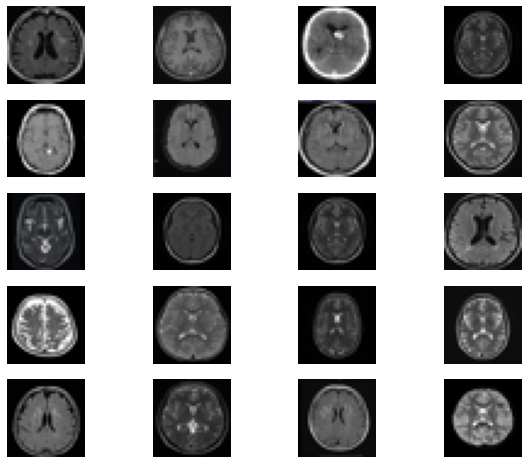

In [190]:
x,y = cs_images('/kaggle/input/brain-mri-images-for-brain-tumor-detection/',classes)

In [191]:
x.shape

(253, 32, 32, 3)

In [192]:
len(y)

253

In [193]:
x

array([[[[  4,   4,   4],
         [  4,   4,   4],
         [  4,   4,   4],
         ...,
         [  3,   3,   3],
         [  3,   3,   3],
         [  4,   4,   4]],

        [[  5,   5,   5],
         [  4,   4,   4],
         [  4,   4,   4],
         ...,
         [  4,   4,   4],
         [  4,   4,   4],
         [  4,   4,   4]],

        [[  6,   6,   6],
         [  5,   5,   5],
         [  4,   4,   4],
         ...,
         [  5,   5,   5],
         [  5,   5,   5],
         [  4,   4,   4]],

        ...,

        [[  3,   3,   3],
         [  3,   3,   3],
         [  3,   3,   3],
         ...,
         [  4,   4,   4],
         [  4,   4,   4],
         [  3,   3,   3]],

        [[  4,   4,   4],
         [  4,   4,   4],
         [  4,   4,   4],
         ...,
         [  3,   3,   3],
         [  3,   3,   3],
         [  3,   3,   3]],

        [[  3,   3,   3],
         [  3,   3,   3],
         [  3,   3,   3],
         ...,
         [  3,   3,   3],
        

In [195]:
y[0:9]

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [196]:
y[245:253]

[1, 1, 1, 1, 1, 1, 1, 1]

In [197]:
y[90:110]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [198]:
#s = pd.Series(y,dtype="category")
s = pd.Series(y)

In [199]:
s

0      0
1      0
2      0
3      0
4      0
      ..
248    1
249    1
250    1
251    1
252    1
Length: 253, dtype: int64

In [202]:
s.value_counts()

1    155
0     98
dtype: int64

In [203]:
s.unique()

array([0, 1])

In [204]:
x_train,x_test,y_train,y_test = train_test_split(x,s,test_size = 0.1,random_state = 1,shuffle = True)

In [205]:
x_train.shape

(227, 32, 32, 3)

In [206]:
x_test.shape

(26, 32, 32, 3)

In [207]:
len(y_train)

227

In [181]:
len(y_test)

26

**CNN MODEL CLASSIFICATION**

In [208]:
from tensorflow.keras.layers import Dropout,BatchNormalization,AveragePooling2D

In [209]:
from tensorflow.keras.layers import MaxPool2D
model = Sequential()
#cnn
"""ConvLayer_1"""
model.add(Conv2D(6,activation = "tanh",kernel_size=5,input_shape = (32,32,3),padding = "same",strides = 1))
#model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size = 2,strides=2,padding = "valid"))
"""ConvLayer_2"""
model.add(Conv2D(16,activation = "tanh",kernel_size=5,strides = 2,padding = "valid"))
#model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size = 2,strides=2,padding = "valid"))
"""ConvLayer_3"""
model.add(Conv2D(120,activation = "tanh",kernel_size=5,strides = 1,padding = "valid"))
# model.add(AveragePooling2D(pool_size = 2,strides=2,padding = "valid"))
"""ConvLayer_4"""
# model.add(Conv2D(256,activation = "relu",kernel_size=3))
# #model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(84,activation = "tanh"))
model.add(Dense(2,activation = "softmax"))

ValueError: Negative dimension size caused by subtracting 5 from 3 for '{{node conv2d_38/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_38/Conv2D/ReadVariableOp)' with input shapes: [?,3,3,16], [5,5,16,120].

In [ ]:
model.summary()

**compilation**

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam",metrics = ['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10)

In [ ]:
y_pred = np.argmax(model.predict(x_test),axis=1)

In [ ]:
y_pred[0:5]

In [ ]:
y_test[0:5]

In [ ]:
_,acc = model.evaluate(x_test,y_pred)
acc*100


In [ ]:
_,acc = model.evaluate(x_test,y_test)
acc*100

In [ ]:
print(_)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)